In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# post-hoc
predictions = np.load('../experiments/predict_video_exp.npy')
# post-hoc 16
predictions_16 = np.load('../experiments/predict_video_exp_16.npy')
# real-time 
# when did it start stimming (bout)
onset_times = np.load('../experiments/onset_times_video_exp.npy')

In [18]:
np.unique(predictions_16, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]),
 array([ 202, 9990,   98, 1238,   29,   67,  973,   29, 7978, 2882,  372,
          15,  519,  262,  843, 1978,  240,  239, 2053,   75, 1523,  270,
         233,    9,    1, 5733,  285, 1344]))

In [28]:
stim_on = 3
# in seconds, when did the animal perform behavior 2
# in post-hoc 5 bheaivor model, where did it say it was grooming (all the frames)
# in 5 behavior model, we never classified head from face groom
behavior_times = np.where(predictions==stim_on)[0]/10
behavior_times
# in 16 behavior model, head groom was 17, face groom 1 was 15
behavior_times_16 = np.where(predictions_16==15)[0]/10
behavior_times_16

behavior_times_16_1 = np.where(predictions_16==17)[0]/10
behavior_times_16_1


array([   6.9,  128. ,  178.3,  181.1,  289.7,  289.8,  320.8,  321.3,
        333.9,  334. ,  383.2,  464.7,  595.5,  670.7,  670.9,  671.3,
        671.5,  671.7,  681.2,  683.7,  724.4,  828.3,  828.4,  859.3,
        910.6,  910.7,  963.1,  963.2,  970.7,  970.8,  971.8,  975.6,
        994.7,  994.8, 1035.6, 1089.7, 1165.3, 1173.9, 1174.8, 1175. ,
       1175.5, 1175.6, 1175.7, 1175.9, 1180.7, 1181.3, 1197.5, 1197.9,
       1226.9, 1242.1, 1242.2, 1242.3, 1242.4, 1242.8, 1243.4, 1249.3,
       1250.7, 1315.4, 1315.6, 1315.8, 1316. , 1413. , 1413.5, 1413.7,
       1413.9, 1414.2, 1414.3, 1432.1, 1432.4, 1467. , 1467.8, 1477.9,
       1478. , 1478.2, 1478.3, 1478.8, 1480.4, 1481.1, 1484.3, 1497.4,
       1726.5, 1726.6, 1727. , 1755.4, 1789.9, 1791.3, 1792.5, 1793.3,
       1800.1, 1802.8, 1819.6, 1986.2, 1988.1, 1988.3, 2049.4, 2051.2,
       2123.4, 2136.2, 2162. , 2162.1, 2162.2, 2162.6, 2193.8, 2200. ,
       2200.3, 2223.6, 2281.3, 2291.5, 2319.4, 2319.6, 2325.4, 2355.5,
      

In [24]:
np.ones_like(onset_times), onset_times

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

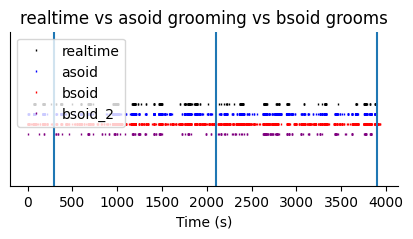

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
# top two, we are comparing consistency in real vs post-hoc
ax.plot(onset_times,
        np.ones_like(onset_times) + 0.3,
        ls='', marker='|', markersize=1, c='k', alpha=1, label='realtime')

ax.plot(behavior_times,
        np.ones_like(behavior_times) + 0.2,
        ls='', marker='|', markersize=1, c='b', alpha=1, label='asoid')

# bottom two we are comparing where head groom is within grooming
ax.plot(behavior_times_16,
        np.ones_like(behavior_times_16)+ 0.1,
        ls='', marker='|', markersize=1, c='r', alpha=1, label='bsoid')

# bottom two we are comparing where head groom is within grooming
ax.plot(behavior_times_16_1,
        np.ones_like(behavior_times_16_1),
        ls='', marker='|', markersize=1, c='purple', alpha=1, label='bsoid_2')

ax.set_yticks([])
ax.set_ylim([0.5, 2])
# subset
# ax.set_xlim([0, 250])


ax.vlines(5*60, 0.5, 2)
ax.vlines(35*60, 0.5, 2)
ax.vlines(65*60, 0.5, 2)
ax.set_ylim([0.5, 2])

ax.set_title('realtime vs asoid grooming vs bsoid grooms')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Time (s)')
ax.legend()
plt.show()

In [10]:
num_behaviors_post, len(onset_times)

(320, 349)

In [7]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
num_behaviors_post = np.unique([predictions[id_start] for id_start in idx_start if id_start < 35*60*10], 
                               return_counts=True)[1][stim_on]

if len(onset_times[onset_times<35*60])<num_behaviors_post:
    print(f'this session matched behavior {stim_on} *** {len(onset_times[onset_times<35*60])/num_behaviors_post*100}% of the time')
else:
    print(f'this session matched behavior {stim_on} *** {num_behaviors_post/len(onset_times[onset_times<35*60])*100}% of the time')


this session matched behavior 3 *** 63.582089552238806% of the time


In [8]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
num_behaviors_post = np.unique([predictions[id_start] for id_start in idx_start if id_start >= 35*60*10], 
                               return_counts=True)[1][stim_on]

if len(onset_times[onset_times>=35*60])<num_behaviors_post:
    print(f'this session matched behavior {stim_on} *** {len(onset_times[onset_times>=35*60])/num_behaviors_post*100}% of the time')
else:
    print(f'this session matched behavior {stim_on} *** {num_behaviors_post/len(onset_times[onset_times>=35*60])*100}% of the time')


this session matched behavior 3 *** 42.5% of the time


In [ ]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
num_behaviors_post = np.unique([predictions[id_start] for id_start in idx_start], return_counts=True)[1][stim_on]

if len(onset_times)<num_behaviors_post:
    print(f'this session matched behavior {stim_on} *** {len(onset_times)/num_behaviors_post*100}% of the time')
else:
    print(f'this session matched behavior {stim_on} *** {num_behaviors_post/len(onset_times)*100}% of the time')
